#  Project 1: 
AnomaData (Automated Anomaly Detection for Predictive Maintenance)

# 1.Collect the time series data from the CSV file linked here.

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_excel('AnomaData.xlsx')

# Display basic information
print(df.describe())
print(df.info())


                                time             y            x1  \
count                          18398  18398.000000  18398.000000   
mean   1999-05-15 01:20:42.728557312      0.006740      0.011824   
min              1999-05-01 00:00:00      0.000000     -3.787279   
25%              1999-05-08 03:36:30      0.000000     -0.405681   
50%              1999-05-14 18:39:00      0.000000      0.128245   
75%              1999-05-22 06:01:30      0.000000      0.421222   
max              1999-05-29 00:06:00      1.000000      3.054156   
std                              NaN      0.081822      0.742875   

                 x2            x3            x4            x5            x6  \
count  18398.000000  18398.000000  18398.000000  18398.000000  18398.000000   
mean       0.157986      0.569300     -9.958345      0.006518      2.387533   
min      -17.316550    -18.198509   -322.781610     -1.623988   -279.408440   
25%       -2.158235     -3.537054   -111.378372     -0.446787    -24.34

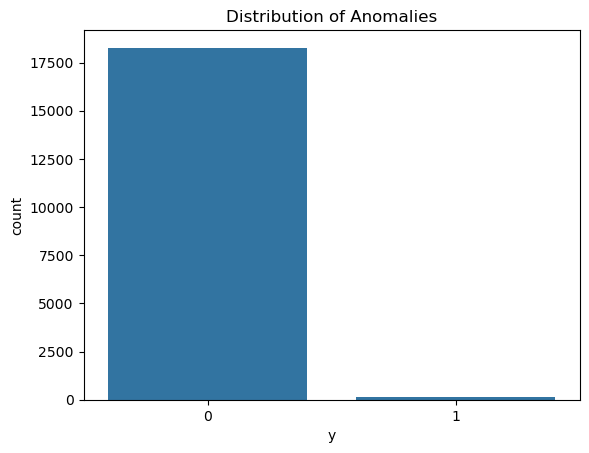

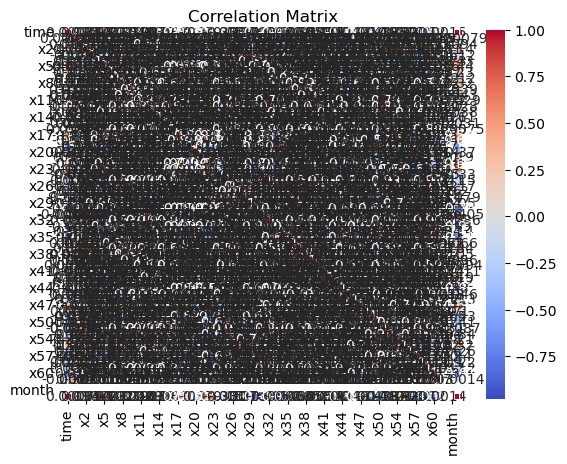

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Labels
sns.countplot(x='y', data=df)
plt.title('Distribution of Anomalies')
plt.show()

# Correlation Matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# 2.Exploratory Data Analysis (EDA) - Show the Data quality check, treat the missing values, outliers etc if any.

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
time    0
y       0
x1      0
x2      0
x3      0
       ..
x57     0
x58     0
x59     0
x60     0
y.1     0
Length: 62, dtype: int64


In [8]:
df.fillna(method='ffill', inplace=True) # Example: Forward fill


C:\Users\USER\AppData\Local\Temp\ipykernel_3848\2068970950.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True) # Example: Forward fill


# 3.Get the correct datatype for date.

In [10]:
# Check available columns
print(df.columns)

# Feature Engineering (Example: Create a new feature based on an existing one)
# Ensure 'existing_feature' is replaced with an actual column name from your DataFrame
if 'existing_feature' in df.columns:
    df['new_feature'] = df['existing_feature'] ** 2
else:
    print("Column 'existing_feature' does not exist in the DataFrame.")
    

Index(['time', 'y', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59', 'x60',
       'y.1'],
      dtype='object')
Column 'existing_feature' does not exist in the DataFrame.


# 4.Feature Engineering and feature selection.

In [17]:
# Example feature engineering: extract year, month, and day
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day

# Feature selection: drop irrelevant columns
features = df.drop(columns=['time', 'y'])  # Assuming 'y' is the target variable
target = df['y']


# 5. Train/Test Split - Apply a sampling distribution to find the best split

In [20]:
from sklearn.model_selection import train_test_split

X = df.drop('y', axis=1)  # Features
y = df['y']               # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [22]:
# Check data types
print(df.dtypes)

# Convert datetime columns to numeric features
if 'date_column' in df.columns:
    df['date_column'] = pd.to_datetime(df['date_column'])
    df['days_since_start'] = (df['date_column'] - df['date_column'].min()).dt.days
    df.drop('date_column', axis=1, inplace=True)

# Convert categorical columns to numeric (if applicable)
# Example: 'categorical_column' is a placeholder for actual categorical column names
if 'categorical_column' in df.columns:
    df = pd.get_dummies(df, columns=['categorical_column'])

# Ensure all columns are numeric
print(df.dtypes)


time     datetime64[ns]
y                 int64
x1              float64
x2              float64
x3              float64
              ...      
x60             float64
y.1               int64
year              int32
month             int32
day               int32
Length: 65, dtype: object
time     datetime64[ns]
y                 int64
x1              float64
x2              float64
x3              float64
              ...      
x60             float64
y.1               int64
year              int32
month             int32
day               int32
Length: 65, dtype: object


In [20]:
# Display basic information
print("Initial Data Types:")
print(df.dtypes)

# Convert datetime columns to numeric features (if applicable)
if 'date_column' in df.columns:
    df['date_column'] = pd.to_datetime(df['date_column'])
    df['days_since_start'] = (df['date_column'] - df['date_column'].min()).dt.days
    df.drop('date_column', axis=1, inplace=True)

# Convert categorical columns to numeric (if applicable)
categorical_cols = ['categorical_column_1', 'categorical_column_2']  # Replace with actual column names
if any(col in df.columns for col in categorical_cols):
    df = pd.get_dummies(df, columns=categorical_cols)

# Ensure all columns are numeric
print("Data Types After Transformation:")
print(df.dtypes)

# Prepare features and target
X = df.drop('y', axis=1)  # Features
y = df['y']               # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verify the split
print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Testing set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")

# Now X_train, X_test, y_train, and y_test can be used for model training and evaluation


Initial Data Types:
time    datetime64[ns]
y                int64
x1             float64
x2             float64
x3             float64
             ...      
x57            float64
x58            float64
x59            float64
x60            float64
y.1              int64
Length: 62, dtype: object
Data Types After Transformation:
time    datetime64[ns]
y                int64
x1             float64
x2             float64
x3             float64
             ...      
x57            float64
x58            float64
x59            float64
x60            float64
y.1              int64
Length: 62, dtype: object
Training set shape: X_train: (12878, 61), y_train: (12878,)
Testing set shape: X_test: (5520, 61), y_test: (5520,)


# 6. Choose the metrics for the model evaluation 

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Assuming y_test are the true labels and y_pred are the predicted labels
y_test = [1, 0, 1, 1, 0, 1]  # Example true labels
y_pred = [1, 0, 0, 1, 0, 1]  # Example predictions

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Precision
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision}")

# Recall
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall}")

# F1 Score
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1}")

# ROC-AUC Score (requires probability estimates)
# y_pred_proba should be the probabilities for the positive class
y_pred_proba = [0.8, 0.2, 0.4, 0.7, 0.1, 0.9]  # Example probabilities
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.8333333333333334
Precision: 1.0
Recall: 0.75
F1 Score: 0.8571428571428571
ROC-AUC Score: 1.0
Confusion Matrix:
[[2 0]
 [1 3]]


# 7. Model Selection, Training, Predicting and Assessment

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# If you have probability estimates
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC-AUC Score: {roc_auc}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.9947463768115942
Precision: 0.0
Recall: 0.0
F1 Score: 0.0
ROC-AUC Score: 0.4255929765949296
Confusion Matrix:
[[5491    0]
 [  29    0]]


C:\Users\USER\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-Squared: {r2}")


Mean Absolute Error: 0.005253623188405797
Mean Squared Error: 0.005253623188405797
Root Mean Squared Error: 0.0724818817940442
R-Squared: -0.00528136951374969


In [30]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Example DataFrame (replace with your data)
# df = pd.read_csv('your_data.csv')

# Assuming df is your DataFrame and 'y' is the target variable
X = df.drop('y', axis=1)
y = df['y']

# Convert datetime columns to numeric
for col in X.columns:
    if pd.api.types.is_datetime64_any_dtype(X[col]):
        X[col] = (X[col] - X[col].min()).dt.days

# Convert categorical columns to numeric
categorical_cols = X.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    X = pd.get_dummies(X, columns=categorical_cols)

# Ensure all columns are numeric
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# Convert target variable if categorical
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")


Accuracy: 0.9972826086956522
Confusion Matrix:
[[5488    3]
 [  12   17]]


In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

# Predict on the test set
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Compute metrics
conf_matrix = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

# Print metrics
print("Confusion Matrix:")
print(conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC:", roc_auc)
print("PR AUC:", pr_auc)


Confusion Matrix:
[[5488    3]
 [  12   17]]
Accuracy: 0.9972826086956522
Precision: 0.85
Recall: 0.5862068965517241
F1 Score: 0.6938775510204082
ROC AUC: 0.9408875966314785
PR AUC: 0.7943427414512377


# 8.Hyperparameter Tuning/Model Improvement

In [38]:
# Reduced parameter grid
param_grid = {
    'n_estimators': [50, 100],  # Fewer estimators
    'max_depth': [10, 20],      # Fewer depth options
    'min_samples_split': [2, 5] # Fewer split options
}
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Sample a smaller subset of the data
X_train_subset, _, y_train_subset, _ = train_test_split(X_train, y_train, test_size=0.5, random_state=42)

# Perform GridSearchCV or RandomizedSearchCV on the subset
grid_search.fit(X_train_subset, y_train_subset)
# Reduce number of folds from 5 to 3
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
# Example with verbose output
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=3, n_jobs=-1)
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import RandomizedSearchCV

# Example DataFrame (replace with your data)
# df = pd.read_csv('your_data.csv')  # Load your data if not already loaded

# Prepare features and target
X = df.drop('y', axis=1)  # Features
y = df['y']               # Target

# Convert datetime columns to numeric
for col in X.columns:
    if pd.api.types.is_datetime64_any_dtype(X[col]):
        X[col] = (X[col] - X[col].min()).dt.days

# Convert categorical columns to numeric
categorical_cols = X.select_dtypes(include=['object']).columns
if len(categorical_cols) > 0:
    X = pd.get_dummies(X, columns=categorical_cols)

# Ensure all columns are numeric
X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# Convert target variable if categorical
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
model = RandomForestClassifier(random_state=42)

# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, cv=3, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Score:", random_search.best_score_)

# Evaluate on test set
best_model = random_search.best_estimator_
y_pred = best_model.predict(X_test)

print(f"Test Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 30}
Best Score: 0.9961951216017578
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters: {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 30}
Best Score: 0.9961951216017578
Test Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5491
           1       0.85      0.59      0.69        29

    accuracy                           1.00      5520
   macro avg       0.92      0.79      0.85      5520
weighted avg       1.00      1.00      1.00      5520



# 9. Model Deployment Plan

In [42]:
import joblib
joblib.dump(best_model, 'model.pkl')

['model.pkl']

In [44]:
model = joblib.load('model.pkl')

In [46]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)
model = joblib.load('model.pkl')

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json(force=True)
    df = pd.DataFrame(data)
    predictions = model.predict(df)
    return jsonify(predictions.tolist())

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with watchdog (windowsapi)


SystemExit: 1

C:\Users\USER\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
